## Exploring profiles of Psychological Optimal Functioning (FOP : Fonctionnement Optimal Psychologique) : Factor Scores

#### Methods used to compute factor scores in MPLUS are explained hereafter:
- Conceptually in the [MPLUS discussion groups](http://www.statmodel.com/discussion/messages/9/3778.html)
- In the technical notes [here](https://www.statmodel.com/download/techappen.pdf) or [here](https://www.statmodel.com/discussion/messages/9/8465.html)

### Step 1 : Preparing the Latent Class Data

In [1]:
# importing the basic packages for data exploration
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_info_columns', 1000)

c:\Users\Franck\.conda\envs\machine_learning\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# check current working directory
os.getcwd()

'd:\\Dropbox\\Projets\\Optimal Functioning\\@GRH\\05-2025\\Support_Methodo\\N_514\\Python\\FOP_4cl\\code'

In [3]:
# check the files contained in the data folder
os.listdir('../data/514')

['2019_data.csv',
 'Bi_ESEM_FOP_4cl_free.dat',
 'Bi_ESEM_FOP_5cl_free.dat',
 'FOP_BIESEM_Fscores.dat',
 'VarNames_espace.csv']

In [4]:
# the data has no variables names so we need to provide these separately
var_names = ['POF','POSEM','NEGEM','FLOW','SELFDET','PERSEFF','STRENGTH','CPROB1','CPROB2','CPROB3','CPROB4','CL_FOP','ID']

In [5]:
# import the data outputted by the latent class analysis - the separator (delimiter) uses one or several spaces
df = pd.read_csv('../data/514/Bi_ESEM_FOP_4cl_free.dat', sep='\s+', header = None, names=var_names )

In [6]:
# check the first few rows
df.head()

,POF,POSEM,NEGEM,FLOW,SELFDET,PERSEFF,STRENGTH,CPROB1,CPROB2,CPROB3,CPROB4,CL_FOP,ID
0,-0.084,1.099,0.685,0.335,0.465,-0.219,-1.174,0.092,0.000,0.908,0.0,3.0,4
1,-0.011,-0.678,-0.919,-0.435,0.590,-1.181,-1.021,0.200,0.000,0.800,0.0,3.0,5
2,-0.600,-0.755,-1.059,0.099,0.557,-0.045,-0.299,0.019,0.532,0.449,0.0,2.0,7
3,0.463,0.193,2.345,0.010,0.926,-0.127,-0.301,0.991,0.000,0.009,0.0,1.0,8
4,1.297,0.659,0.107,-0.393,0.956,0.268,-0.482,0.013,0.000,0.987,0.0,3.0,9


### Step 2 : Visualize the factors scores as a function of the latent classes for interpretation

In [7]:
# generate a dataframe of the factor scores
factors_df = df.loc[:, ['POF','POSEM','NEGEM','FLOW','SELFDET','PERSEFF','STRENGTH','CL_FOP']]

In [8]:
# aggregate the factors scores by mean
factors_means_df = factors_df.groupby(factors_df['CL_FOP']).agg('mean')

In [9]:
factors_means_df

,POF,POSEM,NEGEM,FLOW,SELFDET,PERSEFF,STRENGTH
CL_FOP,,,,,,,
1.0,-0.734048,-0.059448,0.643584,-0.193096,-0.325048,0.020504,0.139344
2.0,0.093387,-0.092126,-0.230244,-0.020941,0.037857,-0.048008,-0.055235
3.0,0.242375,0.045934,-0.197247,0.098745,0.115120,0.009185,-0.059641
4.0,1.625091,0.590455,-0.179727,0.095182,0.574000,0.070636,0.417455


In [10]:
# compute the proportion of each class
factors_df.groupby(factors_df['CL_FOP']).size() / len(factors_df)

CL_FOP
1.0    0.243191
2.0    0.231518
3.0    0.503891
4.0    0.021401
dtype: float64

In [11]:
# alternatively
factors_df['CL_FOP'].value_counts().sort_index(), factors_df['CL_FOP'].value_counts(normalize=True).sort_index()

(CL_FOP
 1.0    125
 2.0    119
 3.0    259
 4.0     11
 Name: count, dtype: int64,
 CL_FOP
 1.0    0.243191
 2.0    0.231518
 3.0    0.503891
 4.0    0.021401
 Name: proportion, dtype: float64)

In [12]:
# renames the classes according to the profiles for a more explicit labeling
factors_means_df.rename(index={
    1.0:"Emotional Dysunctioning\n24.32%",
    2.0:"Moderate Hedonic Functioning\n23.15%",
    3.0:"Emotional(-) Optimal Functioning\n50.39%",
    4.0:"Full Optimal Functioning\n02.14%"
    }, inplace=True)

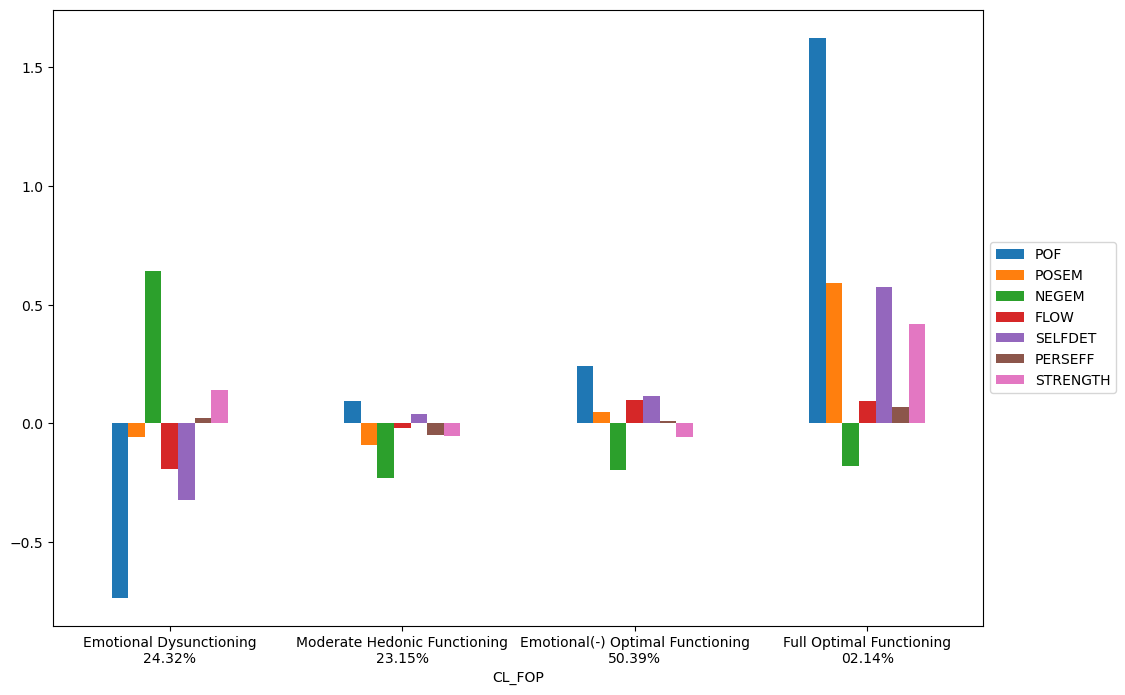

In [13]:
# plot the profiles
factors_means_df.plot(kind='bar', figsize=(12,8))
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xticks(rotation=0)
plt.show()

## Merging the latent class & factors data with the raw data to better understand the latent class profiles

### Step 1 : Merging the datasets

In [14]:
VarNames = list(pd.read_csv('../data/514/VarNames_espace.csv', sep='\s+'))

In [15]:
# import the raw datafile n =1066
raw_df = pd.read_csv('../data/514/2019_data.csv', sep = '\s+', encoding='UTF-8', names=VarNames, na_values=-999)

In [16]:
# check data structure
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 221 columns):
 #    Column   Non-Null Count  Dtype  
---   ------   --------------  -----  
 0    ID       514 non-null    int64  
 1    CSP14    514 non-null    int64  
 2    ACTIF    514 non-null    int64  
 3    PE11     514 non-null    int64  
 4    PE13     514 non-null    int64  
 5    PE14     514 non-null    int64  
 6    PE16     514 non-null    int64  
 7    PE19     514 non-null    int64  
 8    PE3      514 non-null    int64  
 9    PE5      514 non-null    int64  
 10   PE6      514 non-null    int64  
 11   PE10     514 non-null    int64  
 12   PE17     514 non-null    int64  
 13   FLUX2    363 non-null    float64
 14   FLUX5    363 non-null    float64
 15   FLUX6    363 non-null    float64
 16   FLUX7    363 non-null    float64
 17   FLUX8    363 non-null    float64
 18   AD2      363 non-null    float64
 19   AD3      363 non-null    float64
 20   AD4      363 non-null    float

In [17]:
# select the sociodemographic & psychosocial risks variables
Soc_Dem_names = ['ID','CSP14','ACTIF','Sex','Birth','Age','ZipCode','GeoCode']

In [18]:
# subselect a new dataframe
Soc_Dem_df = raw_df[Soc_Dem_names]

In [19]:
# chek the first few rows
Soc_Dem_df.head()

,ID,CSP14,ACTIF,Sex,Birth,Age,ZipCode,GeoCode
0,4,9,1,1,1973,46,53200,2
1,5,8,1,1,1961,58,21800,3
2,7,8,1,2,1972,47,2100,3
3,8,8,1,2,1981,38,2820,3
4,9,6,1,1,1986,33,94200,1


In [20]:
csp_dict = {
1 : "Agriculteur",
2 : "Artisan",
3 : "Commerçant",
4 : "Chef d’entreprise",
5 : "Profession libérale",
6 : "Cadre ou profession intellectuelle supérieure",
7 : "Profession intermédiaire",
8 : "Employé",
9 : "Ouvrier",
10 : "Retraité",
11 : "Demandeur d’emploi",
12 : "Au foyer / sans emploi",
13 : "Etudiant, lycéen",
14 : "Autre"
}

actif_dict = {
    1 : "Oui",
    2 : "Non"
}

sex_dict = {
    1 : "Homme",
    2 : "Femme"
}

Geo_dict = {
1 : "Ile-de-France",
2 : "Nord-Ouest",
3 : "Nord-Est",
4 : "Sud-Ouest",
5 : "Sud-Est",
}

In [21]:
var_list = ['CSP14','ACTIF','Sex','GeoCode']
dict_list = [csp_dict, actif_dict, sex_dict, Geo_dict]
for i in range(len(var_list)):
  Soc_Dem_df[var_list[i]].replace(dict_list[i], inplace=True)

C:\Users\Franck\AppData\Local\Temp\ipykernel_22948\4271360005.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Soc_Dem_df[var_list[i]].replace(dict_list[i], inplace=True)
C:\Users\Franck\AppData\Local\Temp\ipykernel_22948\4271360005.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Soc_Dem_df[var_list[i]].replace(dict_list[i], inplace=Tru

In [22]:
# merge...!
data = pd.merge(Soc_Dem_df,df, left_on="ID",right_on="ID").drop(columns=['ID'])

In [23]:
data

,CSP14,ACTIF,Sex,Birth,Age,ZipCode,GeoCode,POF,POSEM,NEGEM,FLOW,SELFDET,PERSEFF,STRENGTH,CPROB1,CPROB2,CPROB3,CPROB4,CL_FOP
0,Ouvrier,Oui,Homme,1973,46,53200,Nord-Ouest,-0.084,1.099,0.685,0.335,0.465,-0.219,-1.174,0.092,0.000,0.908,0.0,3.0
1,Employé,Oui,Homme,1961,58,21800,Nord-Est,-0.011,-0.678,-0.919,-0.435,0.590,-1.181,-1.021,0.200,0.000,0.800,0.0,3.0
2,Employé,Oui,Femme,1972,47,2100,Nord-Est,-0.600,-0.755,-1.059,0.099,0.557,-0.045,-0.299,0.019,0.532,0.449,0.0,2.0
3,Employé,Oui,Femme,1981,38,2820,Nord-Est,0.463,0.193,2.345,0.010,0.926,-0.127,-0.301,0.991,0.000,0.009,0.0,1.0
4,Cadre ou profession intellectuelle supérieure,Oui,Homme,1986,33,94200,Ile-de-France,1.297,0.659,0.107,-0.393,0.956,0.268,-0.482,0.013,0.000,0.987,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,Cadre ou profession intellectuelle supérieure,Oui,Homme,1982,37,93380,Ile-de-France,-0.206,0.967,-0.006,1.098,-0.025,0.004,-0.678,0.026,0.000,0.974,0.0,3.0
510,Employé,Oui,Homme,1983,36,95310,Ile-de-France,-0.506,-1.966,0.838,0.899,-0.470,0.937,-0.592,0.771,0.000,0.229,0.0,1.0
511,Employé,Oui,Homme,1991,28,28210,Nord-Ouest,-0.278,-1.345,1.605,-0.261,0.257,0.613,0.023,0.855,0.010,0.135,0.0,1.0
512,Employé,Oui,Homme,1981,38,28700,Nord-Ouest,0.197,-0.959,-0.838,1.250,0.174,-0.369,-0.443,0.030,0.000,0.970,0.0,3.0


In [24]:
# check missing values
data.isnull().sum()

CSP14       0
ACTIF       0
Sex         0
Birth       0
Age         0
ZipCode     0
GeoCode     0
POF         0
POSEM       0
NEGEM       0
FLOW        0
SELFDET     0
PERSEFF     0
STRENGTH    0
CPROB1      0
CPROB2      0
CPROB3      0
CPROB4      0
CL_FOP      0
dtype: int64

### Step 3 : Explore profiles of FOP by Socio Demographic variables

In [25]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CSP14     514 non-null    object 
 1   ACTIF     514 non-null    object 
 2   Sex       514 non-null    object 
 3   Birth     514 non-null    int64  
 4   Age       514 non-null    int64  
 5   ZipCode   514 non-null    int64  
 6   GeoCode   514 non-null    object 
 7   POF       514 non-null    float64
 8   POSEM     514 non-null    float64
 9   NEGEM     514 non-null    float64
 10  FLOW      514 non-null    float64
 11  SELFDET   514 non-null    float64
 12  PERSEFF   514 non-null    float64
 13  STRENGTH  514 non-null    float64
 14  CPROB1    514 non-null    float64
 15  CPROB2    514 non-null    float64
 16  CPROB3    514 non-null    float64
 17  CPROB4    514 non-null    float64
 18  CL_FOP    514 non-null    float64
dtypes: float64(12), int64(3), object(4)
memory usage: 76.4+ KB


In [26]:
socdem_df = data.iloc[:,[0,1,2,3,4,6,18]]

In [27]:
socdem_df.info()
socdem_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CSP14    514 non-null    object 
 1   ACTIF    514 non-null    object 
 2   Sex      514 non-null    object 
 3   Birth    514 non-null    int64  
 4   Age      514 non-null    int64  
 5   GeoCode  514 non-null    object 
 6   CL_FOP   514 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 28.2+ KB


,CSP14,ACTIF,Sex,Birth,Age,GeoCode,CL_FOP
0,Ouvrier,Oui,Homme,1973,46,Nord-Ouest,3.0
1,Employé,Oui,Homme,1961,58,Nord-Est,3.0
2,Employé,Oui,Femme,1972,47,Nord-Est,2.0
3,Employé,Oui,Femme,1981,38,Nord-Est,1.0
4,Cadre ou profession intellectuelle supérieure,Oui,Homme,1986,33,Ile-de-France,3.0


In [28]:
# recoding the latent classes categories
socdem_df['CL_FOP'].replace({
    1.0:"Emotional Dysunctioning",
    2.0:"Moderate Hedonic Functioning",
    3.0:"Emotional(-) Optimal Functioning",
    4.0:"Full Optimal Functioning"
    }, inplace=True)

C:\Users\Franck\AppData\Local\Temp\ipykernel_22948\669703612.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  socdem_df['CL_FOP'].replace({
C:\Users\Franck\AppData\Local\Temp\ipykernel_22948\669703612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socdem_df['CL_FOP'].replace({


In [29]:
# check
socdem_df.head()

,CSP14,ACTIF,Sex,Birth,Age,GeoCode,CL_FOP
0,Ouvrier,Oui,Homme,1973,46,Nord-Ouest,Emotional(-) Optimal Functioning
1,Employé,Oui,Homme,1961,58,Nord-Est,Emotional(-) Optimal Functioning
2,Employé,Oui,Femme,1972,47,Nord-Est,Moderate Hedonic Functioning
3,Employé,Oui,Femme,1981,38,Nord-Est,Emotional Dysunctioning
4,Cadre ou profession intellectuelle supérieure,Oui,Homme,1986,33,Ile-de-France,Emotional(-) Optimal Functioning


In [30]:
# save in a new data frame
socdem_data = socdem_df.copy()

In [31]:
""" def con_table(row_var,col_var):
    import pandas as pd
    import numpy as np
    from scipy.stats import chi2_contingency
    
    obs_df = pd.crosstab(row_var, col_var, margins=True)
    obs = obs_df.iloc[0:-1,0:-1]
    chi2, p, dof, exp = chi2_contingency(obs)
    exp = pd.DataFrame(exp, index=obs.index, columns=obs.columns)
    res = (obs-exp)/np.sqrt(exp)
    
    return obs, exp, res, chi2, p, dof """

' def con_table(row_var,col_var):\n    import pandas as pd\n    import numpy as np\n    from scipy.stats import chi2_contingency\n    \n    obs_df = pd.crosstab(row_var, col_var, margins=True)\n    obs = obs_df.iloc[0:-1,0:-1]\n    chi2, p, dof, exp = chi2_contingency(obs)\n    exp = pd.DataFrame(exp, index=obs.index, columns=obs.columns)\n    res = (obs-exp)/np.sqrt(exp)\n    \n    return obs, exp, res, chi2, p, dof '

In [32]:
""" def plot_con_table(obs, size=(10, 8)):

    import matplotlib.pyplot as plt
    
   
    # Plotting the side-by-side bar chart
    obs.plot(kind='bar', stacked=False, figsize=size)
    plt.xlabel(row_var)
    plt.ylabel(col_var)
    plt.title(f'Side-by-Side Bar Chart of {col_var} by {row_var}')
    plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
    plt.show() """

" def plot_con_table(obs, size=(10, 8)):\n\n    import matplotlib.pyplot as plt\n    \n   \n    # Plotting the side-by-side bar chart\n    obs.plot(kind='bar', stacked=False, figsize=size)\n    plt.xlabel(row_var)\n    plt.ylabel(col_var)\n    plt.title(f'Side-by-Side Bar Chart of {col_var} by {row_var}')\n    plt.xticks(rotation=0)  # Rotate x-axis labels if necessary\n    plt.show() "

In [33]:
def con_table(row_var,col_var, pearson = False):
    import pandas as pd
    import numpy as np
    from scipy.stats import chi2_contingency
    import statsmodels.api as sm
    
    obs = pd.crosstab(row_var, col_var)
    chi2, p, dof, exp = chi2_contingency(obs)
    table = sm.stats.Table(obs)
    obs = table.table_orig
    exp = table.fittedvalues

    if pearson :
        res = table.resid_pearson
    else :
        res = table.standardized_resids
    
    return obs, exp, res, chi2, p, dof

In [34]:
# plot residuals
def res_plot(res, row_var, col_var, size = (15,8), loc='lower center') :
    from scipy.stats import norm

    # Calculate the normal quantile for the given probability
    quantile_0_05 = norm.ppf(0.025)
    quantile_0_10 = norm.ppf(0.05)
    res.plot(kind = 'bar', figsize = size)
    plt.title(f'Residual plot of {col_var} as a function of {row_var}')
    plt.axhline(y=-quantile_0_05, color='r', linestyle='', linewidth=1, label = f'p_value : {p:.3f}')
    plt.axhline(y=-quantile_0_05, color='r', linestyle='--', linewidth=1)    
    plt.axhline(y=quantile_0_05, color='r', linestyle='--', linewidth=1, label='alpha=0.05 Significance Threshold')
    plt.axhline(y=-quantile_0_10, color='grey', linestyle='--', linewidth=1)    
    plt.axhline(y=quantile_0_10, color='grey', linestyle='--', linewidth=1, label='alpha=0.10 Significance Threshold')    
    plt.xlabel(row_var)
    plt.ylabel('Standardized Residuals')
    plt.legend(loc=loc, bbox_to_anchor=(1.20,0.35))
    plt.xticks(rotation=90)
    plt.show()

In [35]:
socdem_data.columns[:-1]

Index(['CSP14', 'ACTIF', 'Sex', 'Birth', 'Age', 'GeoCode'], dtype='object')

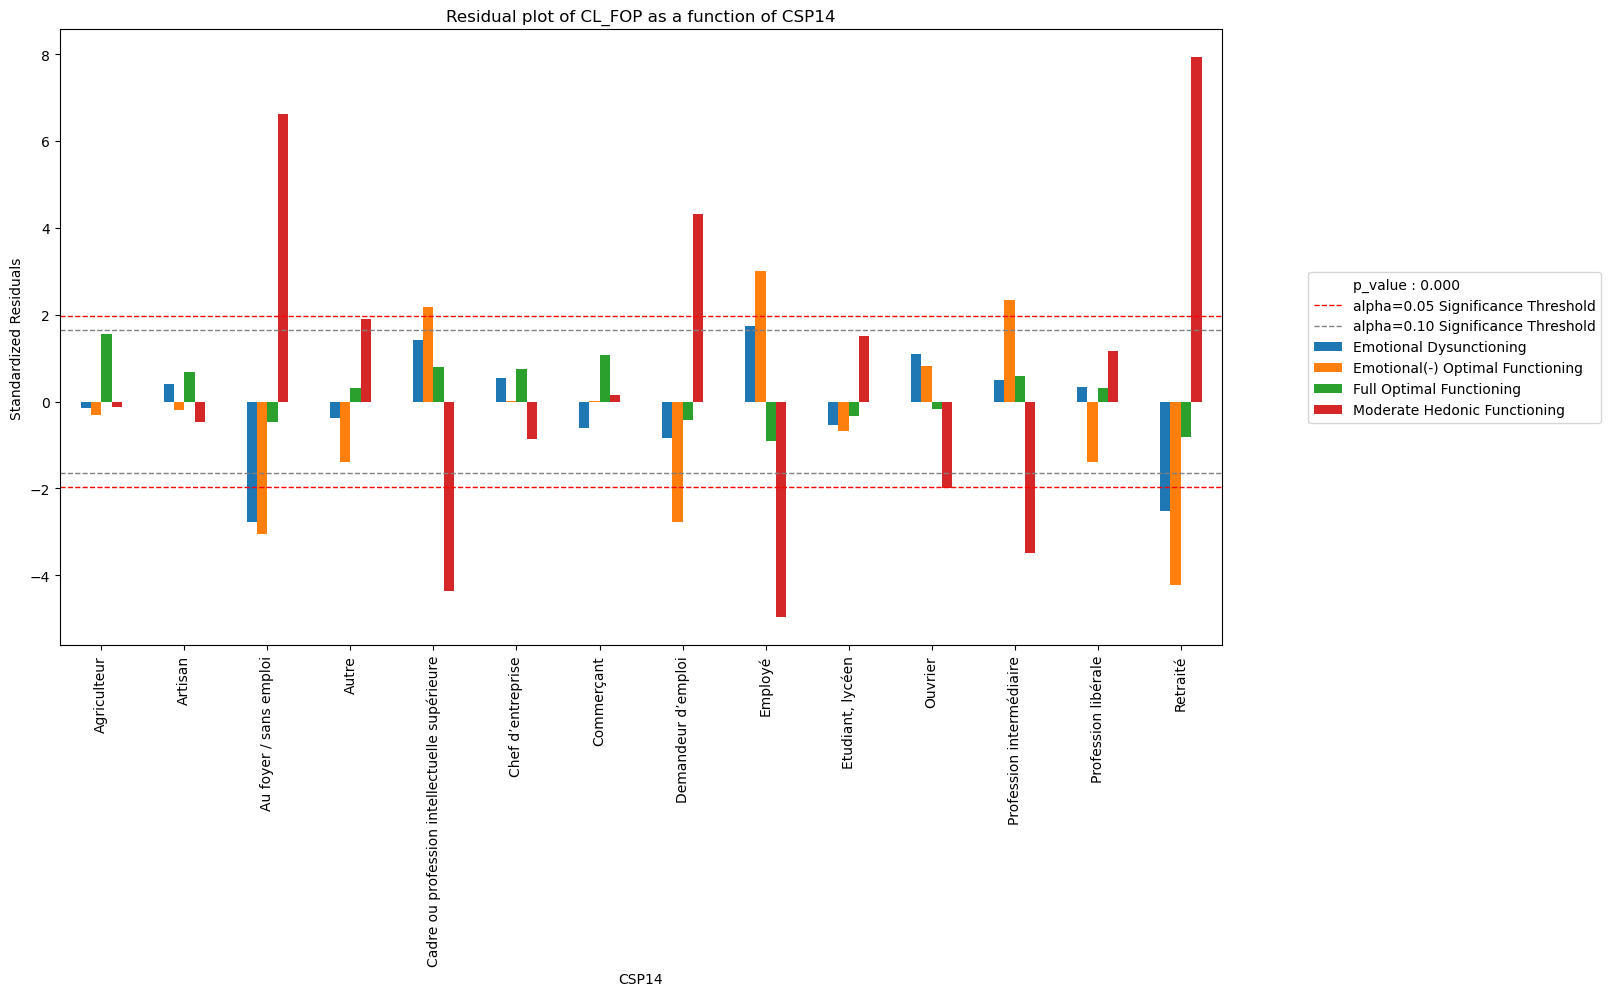

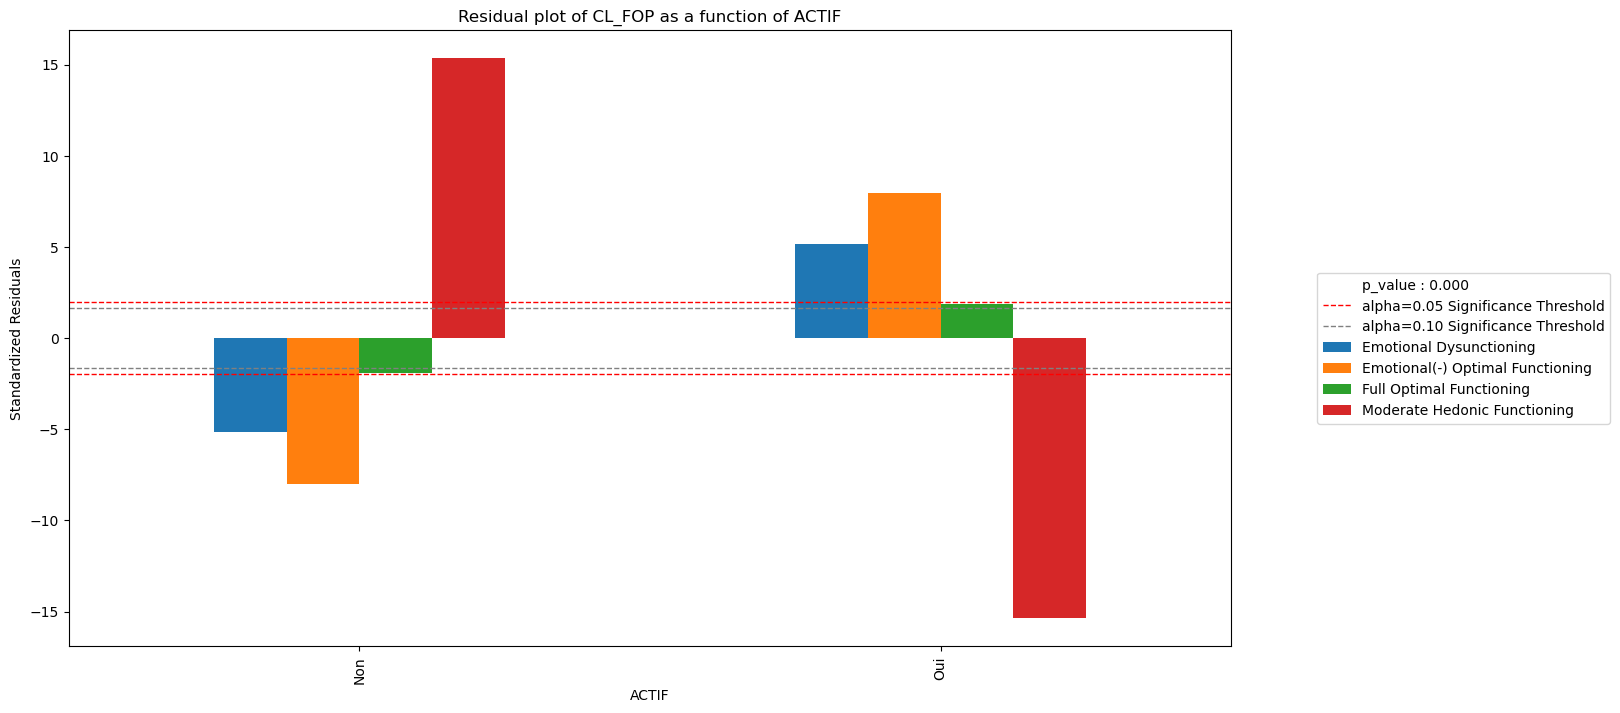

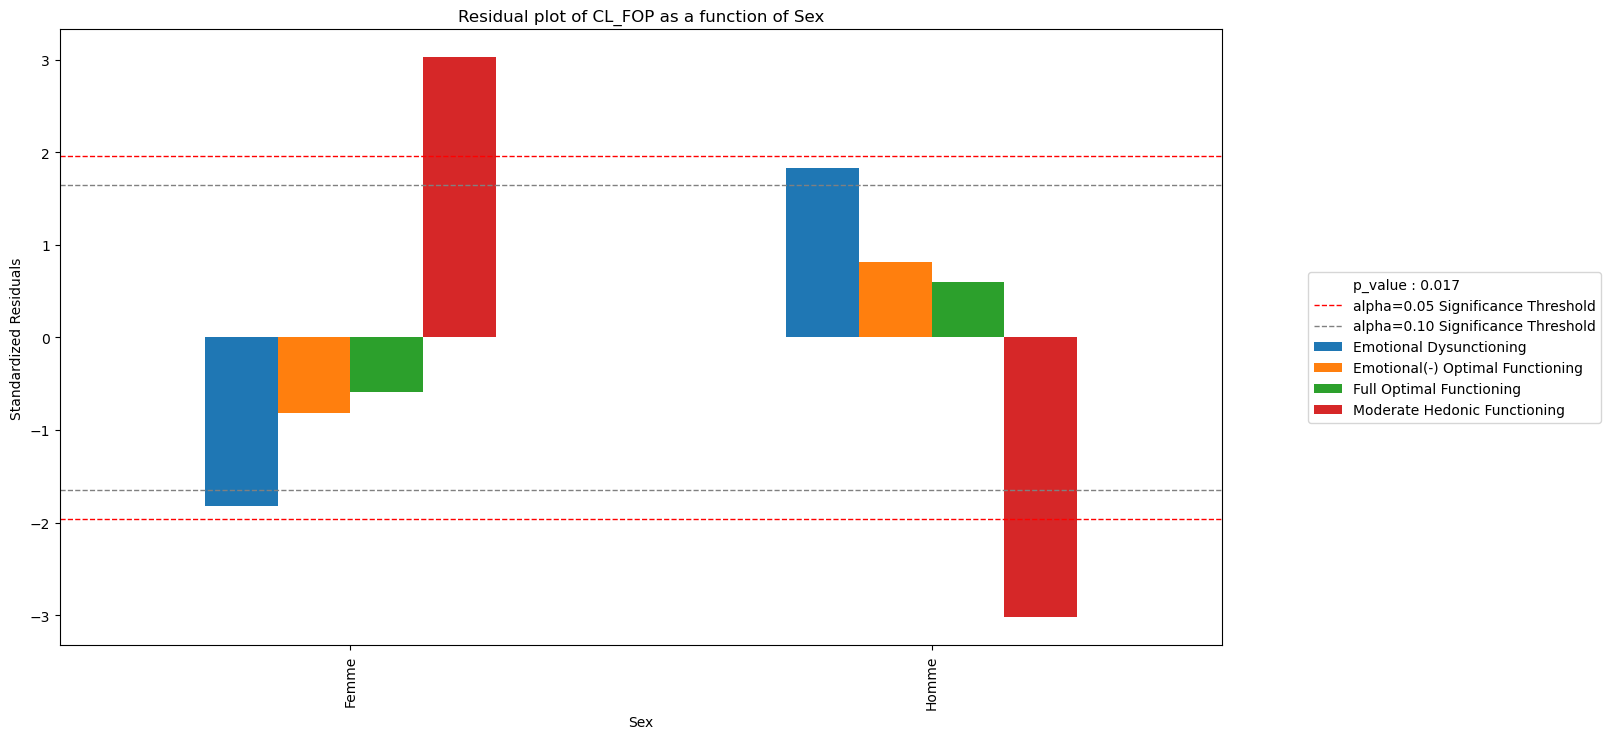

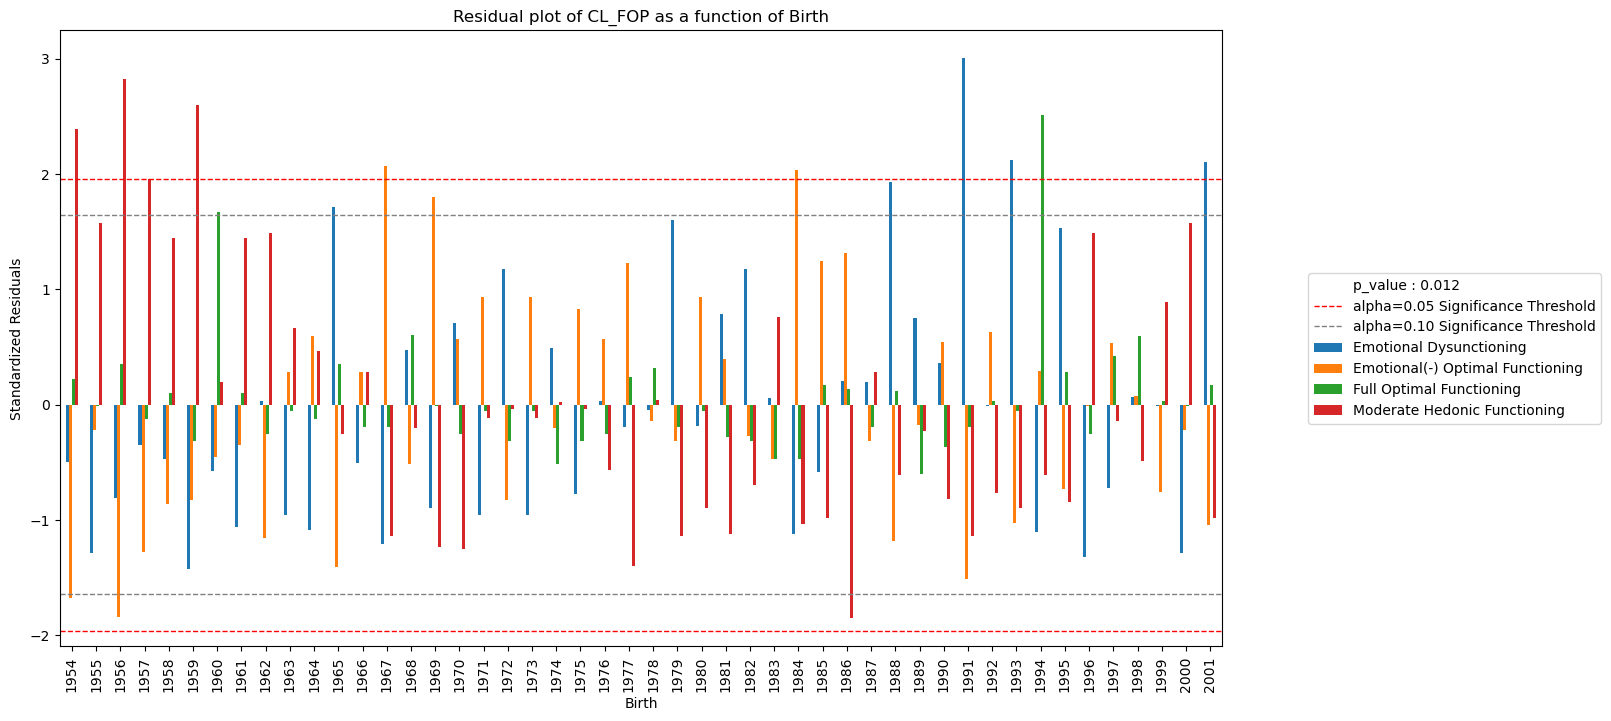

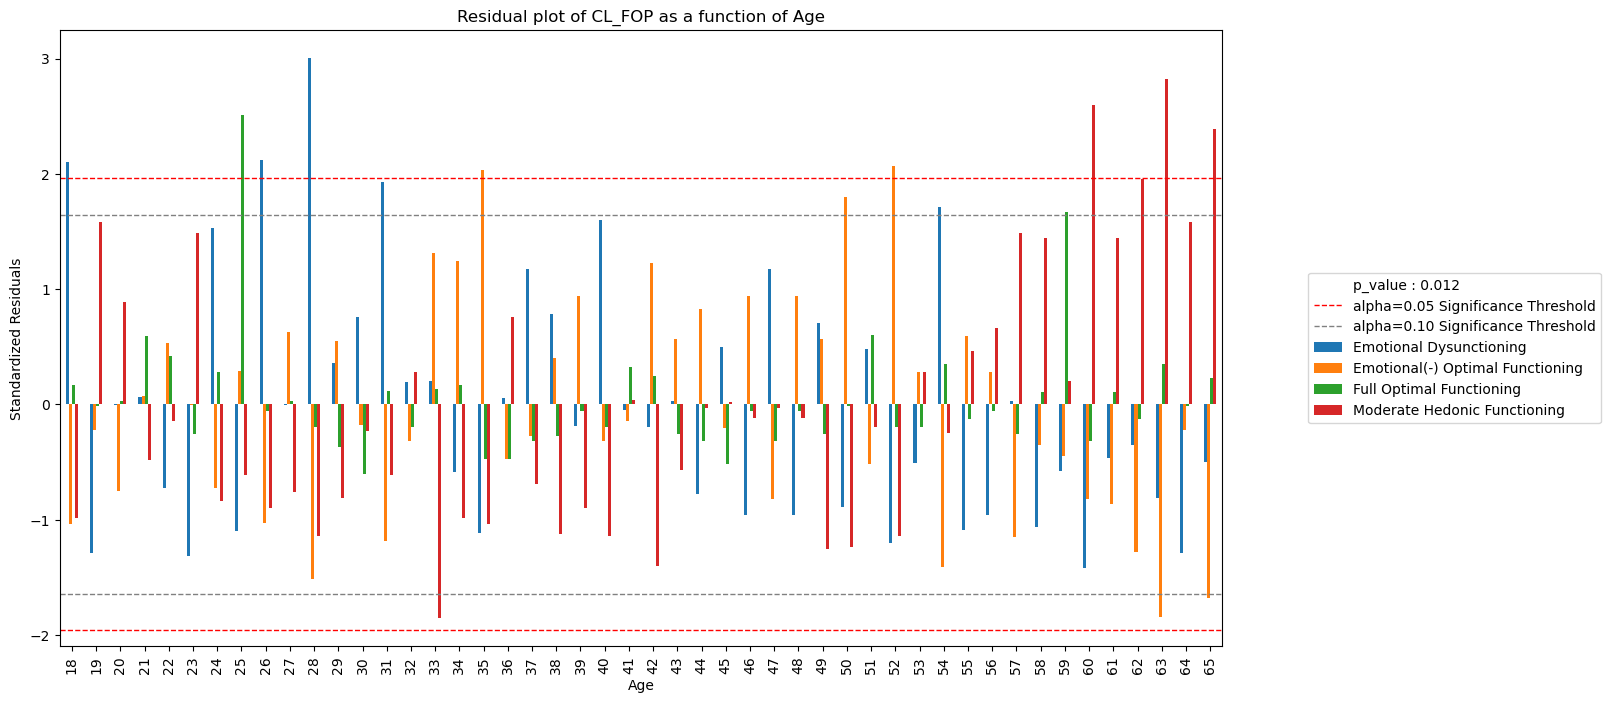

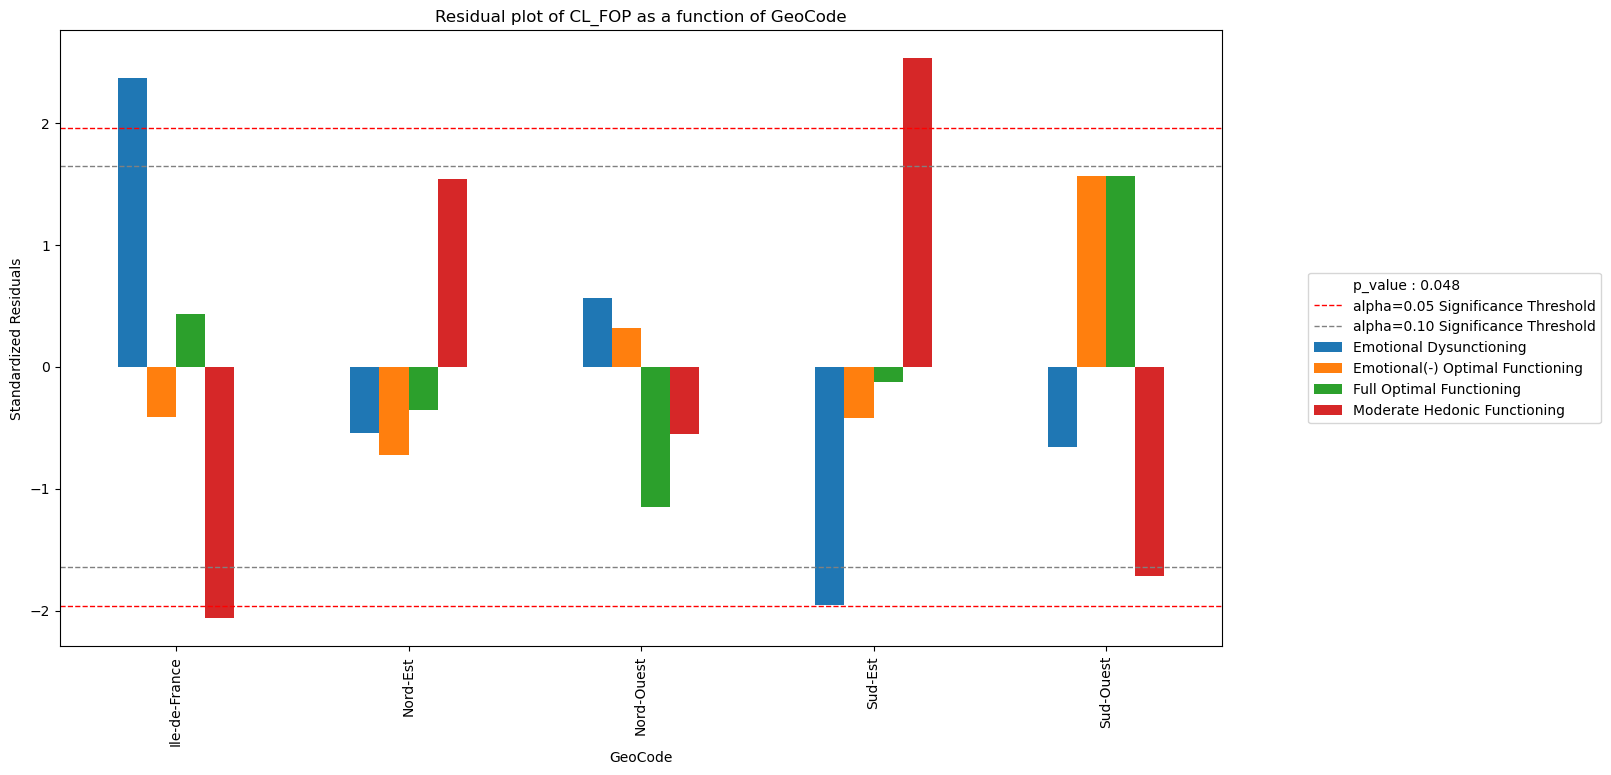

In [36]:
obs_list = []
exp_list = []
res_list = []
chi2_list = []
p_list = []
dof_list = []
for col in socdem_data.columns[:-1] :
    row_var = col
    col_var = 'CL_FOP'
    
    X = socdem_data[row_var]
    Y = socdem_data[col_var]

    obs, exp, res, chi2, p, dof = con_table(X,Y)
    obs_list.append(obs)
    exp_list.append(exp)
    res_list.append(res)
    chi2_list.append(chi2)
    p_list.append(p)
    dof_list.append(dof)

    res_plot(res, row_var, col_var)